Problem Statement 1 :
    Clean your data. Find all the null values in your dataset. Remove columns with categorical data that cannot be substituted. Fill columns with data that can be derived from other attributes. 

In [60]:
import pandas as pd 
df=pd.read_csv(r"C:\Users\ANJAN\Desktop\netflix.titles.csv")
df['release_year'] = df['release_year'].fillna('No release year')
df.drop_duplicates()
df.director.fillna('None',inplace=True)
df.cast.fillna('None',inplace=True)
df.country.fillna('None',inplace=True)
df.dropna(subset=['date_added','rating'],inplace=True)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,None,United States,"September 25, 2021",2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
3,s2,TV Show,Blood & Water,None,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
5,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",None,"September 24, 2021",2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
7,s4,TV Show,Jailbirds New Orleans,None,None,None,"September 24, 2021",2021.0,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
9,s5,TV Show,Kota Factory,None,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
17605,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007.0,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
17607,s8804,TV Show,Zombie Dumb,None,None,None,"July 1, 2019",2018.0,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
17609,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009.0,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
17611,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006.0,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


###Here we drop all the duplicate values to clean the dataset. We fill the other null values under the rows with None with the help of fillna functionality. We also drop certain null values using the dropna functionality 

Problem Statement 2 : Generate a visualization to identify the most popular genre in each of the countries in the dataset. 

C:\Users\ANJAN\AppData\Local\Temp/ipykernel_13508/3219671260.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(35,35))


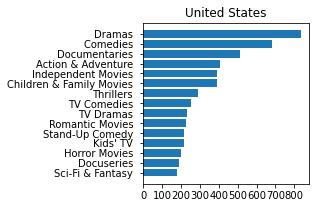

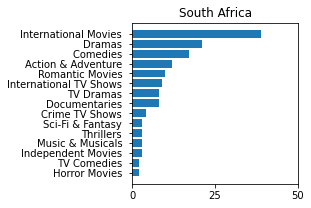

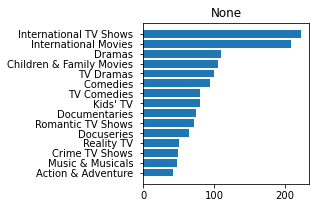

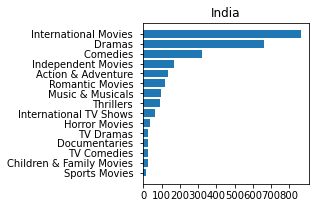

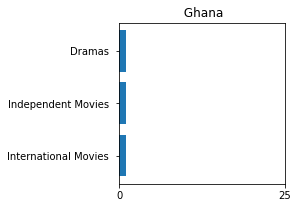

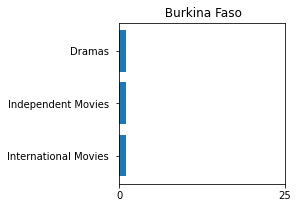

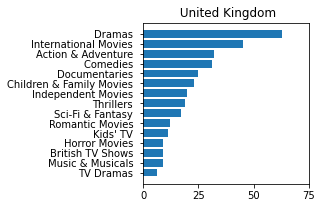

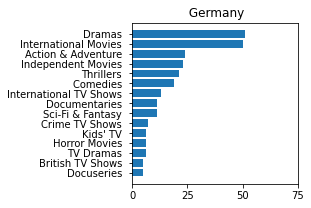

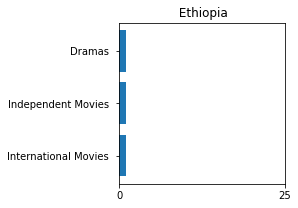

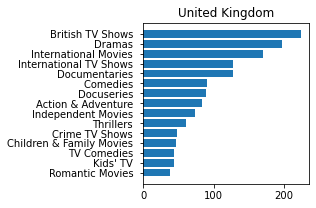

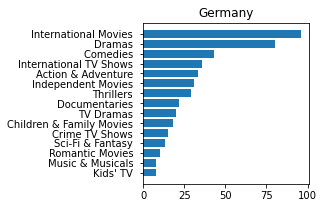

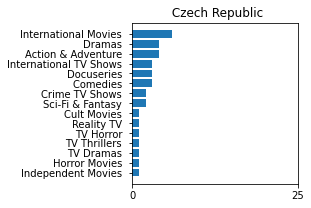

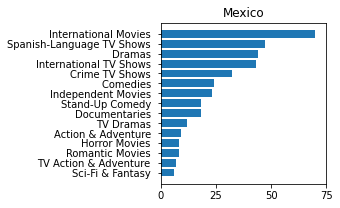

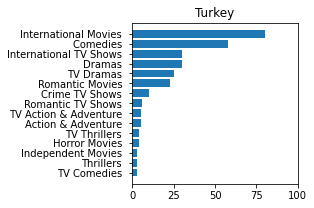

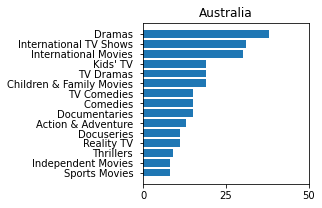

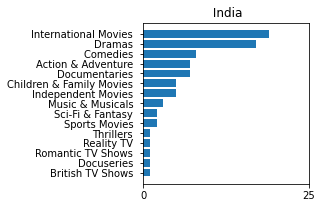

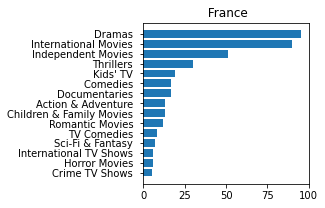

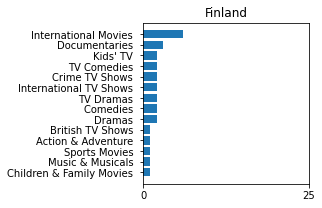

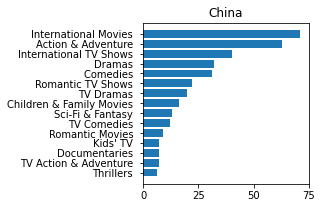

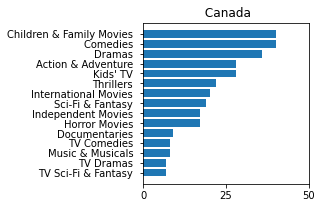

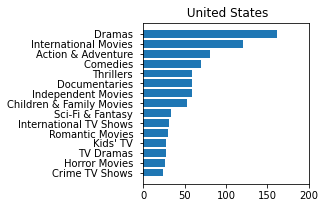

In [1]:
import pandas as pd 
from collections import Counter
import matplotlib.pyplot as plt
import math 

df=pd.read_csv(r"C:\Users\ANJAN\Desktop\netflix.titles.csv")
df['release_year'] = df['release_year'].fillna('No release year')
df.drop_duplicates()
df.director.fillna('None',inplace=True)
df.cast.fillna('None',inplace=True)
df.country.fillna('None',inplace=True)
df.dropna(subset=['date_added','rating'],inplace=True)
df

countries_list=[]
for column in df[['country']]:
    # Select column contents by column name using [] operator
    columnSeriesObj = df[column]
    a=list(columnSeriesObj.values)
    for word in a:
        b=word.split(',')
        for w in b:
            if w in countries_list:
                continue
            else:
                countries_list.append(w)
                
x=1
    
for co in countries_list[:21]:
        
    df["coun"] = df['country'].fillna("").apply(lambda x : 1 if co.lower() in x.lower() else 0)
    small = df[df["coun"] == 1]
        
    genre = ", ".join(small['listed_in'].fillna("")).split(", ")
    tags = Counter(genre).most_common(15)
    tags = [_ for _ in tags if "" != _[0]]
        
    labels,values = [_[0] + " " for _ in tags][::-1],[_[1] for _ in tags][::-1]
    if max(values)>200:
        values_int = range(0, math.ceil(max(values)), 100)
    elif max(values)>100 and max(values)<=200:
        values_int = range(0, math.ceil(max(values))+50, 50)
    else:
        values_int = range(0, math.ceil(max(values))+25, 25)
    plt.figure(figsize=(35,35))
        
    plt.subplot(10,10,x)
    plt.barh(labels,values)
    plt.xticks(values_int)
    plt.title(co)
    x+=1
        
plt.show()

###Here we can see the most popular generes in all of the countries given in the dataset 

Problem Statement 3 --> Part 1 : Create a column which separates out only Indian shows

In [51]:
import pandas as pd 
df=pd.read_csv(r"C:\Users\ANJAN\Desktop\netflix.titles.csv")
df1, df2 = [y for _, y in df.groupby(df['country'] == 'India')]
df2

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
9,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
49,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998.0,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
79,s40,TV Show,Chhota Bheem,NaN,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"September 16, 2021",2021.0,TV-Y7,3 Seasons,Kids' TV,"A brave, energetic little boy with superhuman ..."
101,s51,TV Show,Dharmakshetra,NaN,"Kashmira Irani, Chandan Anand, Dinesh Mehta, A...",India,"September 15, 2021",2014.0,TV-PG,1 Season,"International TV Shows, TV Dramas, TV Sci-Fi &...","After the ancient Great War, the god Chitragup..."
133,s67,TV Show,Raja Rasoi Aur Anya Kahaniyan,NaN,NaN,India,"September 15, 2021",2014.0,TV-G,1 Season,"Docuseries, International TV Shows",Explore the history and flavors of regional In...
...,...,...,...,...,...,...,...,...,...,...,...,...
17547,s8774,Movie,Yanda Kartavya Aahe,Kedar Shinde,"Ankush Choudhary, Smita Shewale, Mohan Joshi, ...",India,"January 1, 2018",2006.0,TV-PG,151 min,"Comedies, Dramas, International Movies",Thanks to an arranged marriage that was design...
17551,s8776,TV Show,Yeh Meri Family,NaN,"Vishesh Bansal, Mona Singh, Akarsh Khurana, Ah...",India,"August 31, 2018",2018.0,TV-PG,1 Season,"International TV Shows, TV Comedies","In the summer of 1998, middle child Harshu bal..."
17597,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014.0,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...
17599,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009.0,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...


###Here we group the Indian content into yet another dataframe using the groupby functionality 

Problem Statement 3 --> Part 2 : Also find out the percentage of Indian shows in the entire dataset.

In [4]:
import pandas as pd 
df=pd.read_csv(r"C:\Users\ANJAN\Desktop\netflix.titles.csv")
df1, df2 = [x for _, x in df.groupby(df['country'] == 'India')]
df2

subset = df2[['show_id','type','title','director','cast','date_added','release_year','rating','duration','listed_in','description']]
tuples = [tuple(x) for x in subset.values]
tuples


subset_1 = df[['show_id','type','title','director','cast','date_added','release_year','rating','duration','listed_in','description']]
tuples_1 = [tuple(x) for x in subset_1.values]
tuples_1


perc=(len(tuples)/len(tuples_1))*100
print("Percentage of Indian content in the dataset is ",perc)

Percentage of Indian content in the dataset is  5.518337685931645


###Here we convert the dataframe containing Indian content and the parent dataset into tuples to calculate the percentage of Indian shows in the wholw DATASET 

Problem Statement 4 : Create a pie-chart which depicts the ratings of all movies

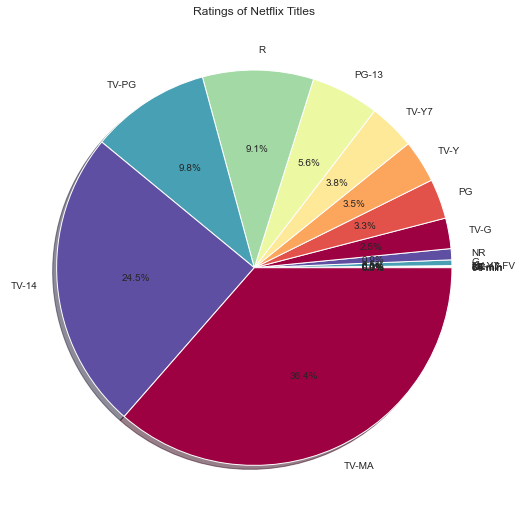

In [56]:
import pandas as pd 
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv(r"C:\Users\ANJAN\Desktop\netflix.titles.csv")
title_rating = df.groupby('rating').agg('count')
rating_labels = title_rating.show_id.sort_values().index 
rating_counts = title_rating.show_id.sort_values()

plt.figure(1, figsize=(40,20))
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='Ratings of Netflix Titles')
type_show_ids = plt.pie(rating_counts, labels=rating_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

Here we plot the pie-chart for the ratings of the various shows present in the dataset . since many ratings  are overlapping , we define a function that calculates the 75th percentile and groups the lesser counts together in an ‘other’ category:

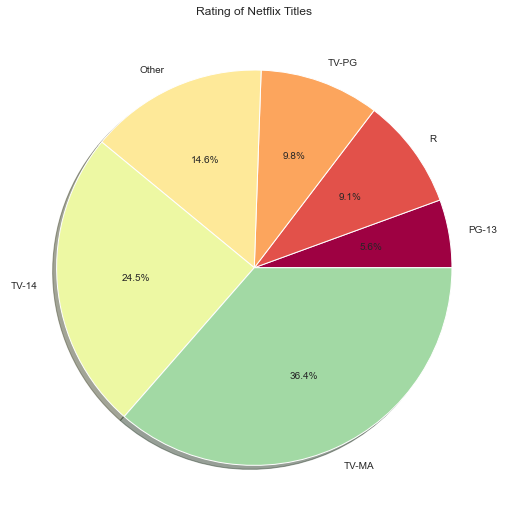

In [54]:
import pandas as pd 
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv(r"C:\Users\ANJAN\Desktop\netflix.titles.csv")
title_rating = df.groupby('rating').agg('count')
rating_labels = title_rating.show_id.sort_values().index 
rating_counts = title_rating.show_id.sort_values()

plt.figure(1, figsize=(40,20))
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

def group_lower_ranking_values(column):
    rating_counts = df.groupby(column).agg('count')
    pct_value = rating_counts[lambda x: x.columns[0]].quantile(.75)
    values_below_pct_value = rating_counts[lambda x: x.columns[0]].loc[lambda s: s < pct_value].index.values
    def fix_values(row):
        if row[column] in values_below_pct_value:
            row[column] = 'Other'
        return row 
    rating_grouped = df.apply(fix_values, axis=1).groupby(column).agg('count')
    return rating_grouped

rating_grouped = group_lower_ranking_values('rating')
rating_labels = rating_grouped.show_id.sort_values().index 
rating_counts = rating_grouped.show_id.sort_values()

plt.subplot(the_grid[0, 1], aspect=1, title='Rating of Netflix Titles')
type_show_ids = plt.pie(rating_counts, labels=rating_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()




we know from the above pie-chart that the majority of shows in the dataset have the ratings TV-14 and TV-MA 

Problem Statement 5 : Suppose an India- based producer wants to release a PG rated show on Netflix this year. What month should the producer release the show? Justify your answer using bar graphs

In [63]:
import pandas as pd 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
df=pd.read_csv(r"C:\Users\ANJAN\Desktop\netflix.titles.csv")

df1, df2 = [x for _, x in df.groupby(df['rating'].str.startswith('P'))]
df2

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
13,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021.0,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
19,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021.0,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
55,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010.0,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
57,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,"September 19, 2021",2013.0,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...
...,...,...,...,...,...,...,...,...,...,...,...,...
17535,s8768,Movie,XXX: State of the Union,Lee Tamahori,"Ice Cube, Samuel L. Jackson, Willem Dafoe, Sco...",United States,"January 1, 2019",2005.0,PG-13,101 min,Action & Adventure,"In this action-packed follow-up to XXX, U.S. i..."
17553,s8777,Movie,Yellowbird,Christian De Vita,"Dakota Fanning, Seth Green, Christine Baranski...","France, Belgium","August 5, 2015",2014.0,PG,90 min,"Children & Family Movies, Comedies",An orphaned bird tags along with a flock on th...
17565,s8783,Movie,Yoga Hosers,Kevin Smith,"Harley Quinn Smith, Lily-Rose Depp, Johnny Dep...",United States,"December 2, 2016",2016.0,PG-13,88 min,"Comedies, Horror Movies, Independent Movies",With an all-important high school party at sta...
17587,s8794,Movie,"Yours, Mine and Ours",Raja Gosnell,"Dennis Quaid, Rene Russo, Sean Faris, Katija P...",United States,"November 20, 2019",2005.0,PG,88 min,"Children & Family Movies, Comedies",When a father of eight and a mother of 10 prep...


### Here we group all the shows in the dataset containing the various PG ratings into one dataframe 

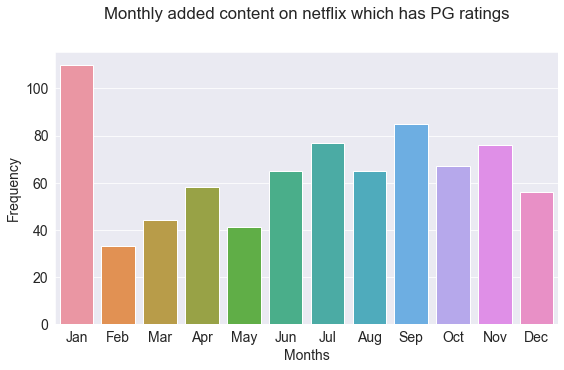

In [58]:
import pandas as pd 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
df=pd.read_csv(r"C:\Users\ANJAN\Desktop\netflix.titles.csv")

df1, df2 = [x for _, x in df.groupby(df['rating'].str.startswith('P') )]

monthly_content=pd.DatetimeIndex(df2.date_added).month.value_counts().sort_index()
order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

plt.title("Monthly added content on netflix which has PG ratings",y=1.1)
sns.barplot(y=monthly_content.values,x=order);
plt.xlabel("Months")
plt.ylabel("Frequency");

### Using the dataframe from above , we construct a bar graph where we can see in what frequency the PG rated content is released according to the dataset. Thus if a India based producer wants to release PG rated content , he should release it in the month of February since less than 40 PG rated content gets released in that month . So there is a higher probability of his content being viewed more as the viewers won't miss it when compared to him releasing the content in any of the other months .   